# Импорт библиотек

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Чтение датасета

In [2]:
df = pd.read_csv("data.csv")
df.head()

,болезнь,Возраст,Лейкоциты,КДО,склеростин,WIF-1,GSK-3α
0,0,57,8.9,105.0,270.0,1930.0,120.0
1,0,60,6.2,105.0,232.0,2170.0,105.0
2,0,50,7.6,119.0,250.0,2170.0,110.0
3,0,54,6.6,134.0,160.0,2175.0,110.0
4,0,49,6.3,105.0,160.0,1450.0,110.0


# Разделение датасета для обучения и тестирования

In [3]:
X = df.drop('болезнь', axis=1)
y = df['болезнь']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели

In [4]:
rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

# Тестирование модели

In [5]:
pred = rnd_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



# Визуализация модели

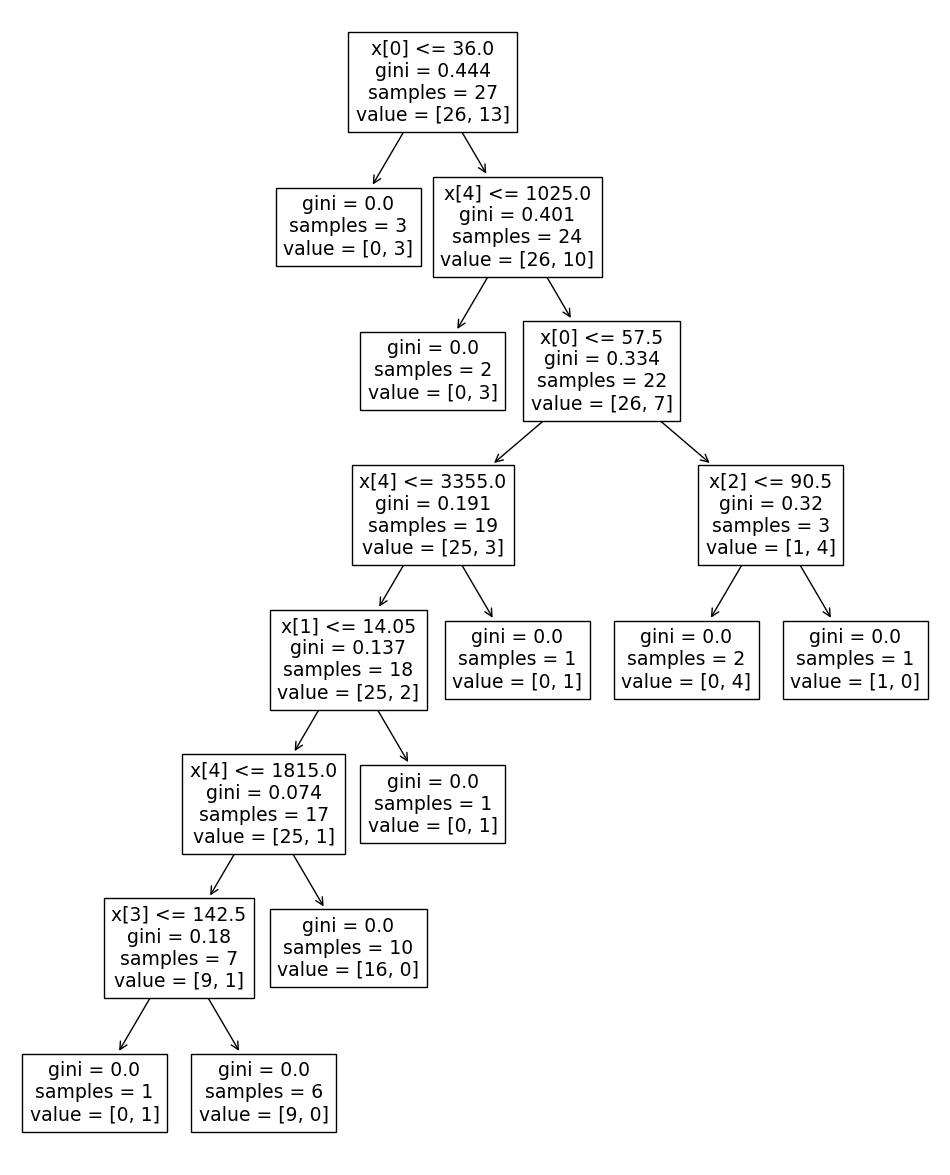

In [12]:
# Визуализация первого дерева поиска решений в случайном лесе
# Настройка размера изображения
fig, ax = plt.subplots(figsize=(12, 15))
tree.plot_tree(rnd_clf.estimators_[0], ax=ax)
plt.show()

# Сохранение модели

In [7]:
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rnd_clf, file)

In [8]:
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

model

RandomForestClassifier(n_jobs=-1)